In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#assignment: do a binomial distribution sumulation analysis for weekends of the tips dataset ()


In [3]:
df=pd.read_csv("tips.csv")
print(df)
print(df.info())

     total_bill   tip  gender smoker   day    time  size  price_per_person  \
0         16.99  1.01  Female     No   Sun  Dinner     2              8.49   
1         10.34  1.66    Male     No   Sun  Dinner     3              3.45   
2         21.01  3.50    Male     No   Sun  Dinner     3              7.00   
3         23.68  3.31    Male     No   Sun  Dinner     2             11.84   
4         24.59  3.61  Female     No   Sun  Dinner     4              6.15   
..          ...   ...     ...    ...   ...     ...   ...               ...   
239       29.03  5.92    Male     No   Sat  Dinner     3              9.68   
240       27.18  2.00  Female    Yes   Sat  Dinner     2             13.59   
241       22.67  2.00    Male    Yes   Sat  Dinner     2             11.34   
242       17.82  1.75    Male     No   Sat  Dinner     2              8.91   
243       18.78  3.00  Female     No  Thur  Dinner     2              9.39   

             Payer Name     CC Number Payment ID  
0    Christy

In [4]:
saturday="Sat"
sunday="Sun"
wekend_df=df[(df["day"]==sunday)|(df["day"]==saturday)]
wekend_df

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3,11.94,Kimberly Crane,6.761840e+11,Sat9777
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5.296070e+15,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3.506810e+15,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6.011890e+15,Sat3880


In [5]:
total_peoples=df['Payment ID'].nunique()
wekend_people=len(wekend_df)


In [6]:
people_probability=wekend_people/total_peoples

In [7]:
print(f'total peoples:{total_peoples}')
print(f'wekend_people:{wekend_people}')
print(f'people_probability:{people_probability:.4f}')

total peoples:243
wekend_people:163
people_probability:0.6708


In [8]:
n=1000
p=people_probability
simulated_purchase=np.random.binomial(n,p,3000)

In [9]:
simulated_df=pd.DataFrame(simulated_purchase,columns=["number of peoples"])
print(simulated_df.describe())

       number of peoples
count        3000.000000
mean          670.104333
std            14.650176
min           612.000000
25%           660.000000
50%           670.000000
75%           680.000000
max           729.000000


In [10]:
simulated_df

,number of peoples
0,678
1,662
2,667
3,675
4,671
...,...
2995,697
2996,690
2997,648
2998,701


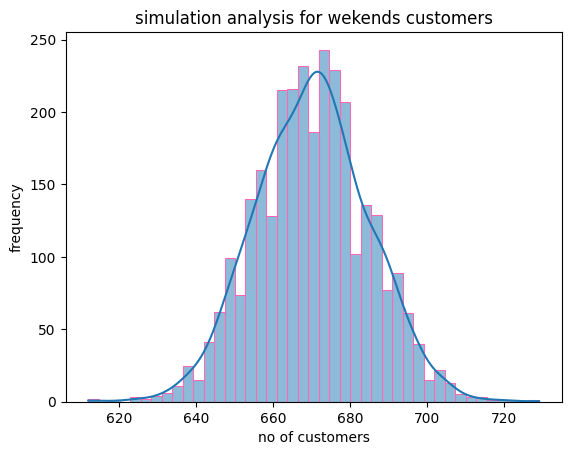

In [11]:
sns.histplot(simulated_df['number of peoples'],bins="auto",kde=True,edgecolor="hotpink")


plt.xlabel("no of customers")
plt.ylabel("frequency")
plt.title("simulation analysis for wekends customers")

plt.show()

In [12]:
#a life insurance salesman sells on the average 3 life insurance policies per week use poisson's law to calculate the probability
'''
a.in a given week he will sell some policies 
b.in a given week he will sell 2 or more policies but not more than five policies 
c.assuming that per week there are 5 working days what is the probability that on a given day he will sell on policy?


'''
from scipy.stats import poisson
#lambda
mu=3
#probability of selling some policies in a week
print("the probability of selling some policies in a week:",1-poisson.pmf(k=0,mu=mu))

the probability of selling some policies in a week: 0.950212931632136


In [13]:
#probability of selling some policies in a week
print("the probability of selling three policies in a week: ",poisson.pmf(k=3,mu=mu))

the probability of selling three policies in a week:  0.22404180765538775


In [14]:
#the probability of selling 2 or more policies but less than 5 policies in a week
print('the probability of selling 2 or more policies but less than 5 policies in a week: ',sum(poisson.pmf(k=[2,3,4],mu=mu)))

the probability of selling 2 or more policies but less than 5 policies in a week:  0.6161149710523164


In [15]:
#assuming that per week three are 5 working days , what is the probability that on a given date will sell on policy?
print("the proability that on a given day he will sell one policy: ",poisson.pmf(k=1,mu=3/5) )

the proability that on a given day he will sell one policy:  0.3292869816564159
